# Assignment 2

Write a program for Leibniz series for PI calculation to demonstrate the performance enhancement done by parallelizing the code through Open MP work-sharing of loops.

* Implement the code with different thread count and different maximum number of terms to be calculated for the series such as thread count 10, 20 and terms 100, 1000, 10000, 1000000.

* Display a visualization of performance comparison between serial and parallel, a visual analysis of delay/speedup with the help of varying thread counts and maximum terms in the series for Pi value calculation.

In [1]:
import numpy as np
import threading
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# sequential using leibniz method

In [3]:
def estimate_pi_leibniz_sequential(num_terms):
    pi_estimate = 0

    start_time = time.time()

    for k in range(num_terms):
        term = (-1) ** k / (2 * k + 1)
        pi_estimate += term

    pi_estimate *= 4

    end_time = time.time()
    elapsed_time = end_time - start_time

    return pi_estimate, elapsed_time

In [4]:
num_terms_list = [100, 500, 700, 1000, 5000, 10000, 1000000]
pi_estimates = []
elapsed_times = []

In [5]:
for num_terms in num_terms_list:
    pi_estimate, elapsed_time = estimate_pi_leibniz_sequential(num_terms)
    pi_estimates.append(pi_estimate)
    elapsed_times.append(elapsed_time)
    print(f"Number of Terms: {num_terms}, Estimated Pi: {pi_estimate}, Elapsed Time: {elapsed_time:.6f} seconds")

Number of Terms: 100, Estimated Pi: 3.1315929035585537, Elapsed Time: 0.000000 seconds
Number of Terms: 500, Estimated Pi: 3.139592655589785, Elapsed Time: 0.000000 seconds
Number of Terms: 700, Estimated Pi: 3.1401640828900845, Elapsed Time: 0.000000 seconds
Number of Terms: 1000, Estimated Pi: 3.140592653839794, Elapsed Time: 0.000000 seconds
Number of Terms: 5000, Estimated Pi: 3.141392653591791, Elapsed Time: 0.000000 seconds
Number of Terms: 10000, Estimated Pi: 3.1414926535900345, Elapsed Time: 0.004056 seconds
Number of Terms: 1000000, Estimated Pi: 3.1415916535897743, Elapsed Time: 0.282051 seconds


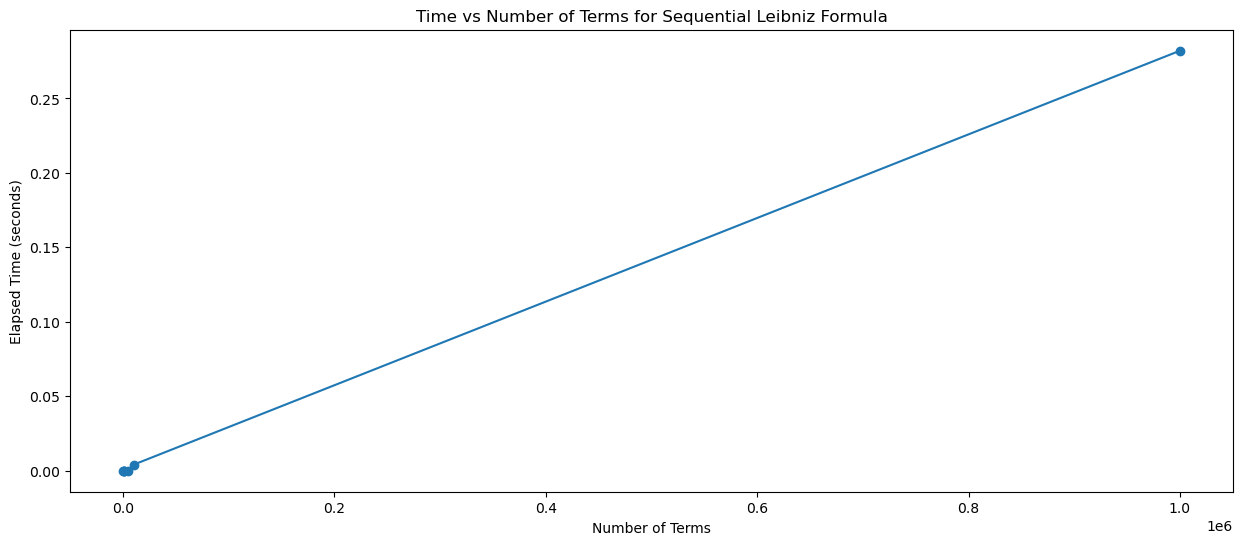

In [6]:
plt.figure(figsize=(15, 6))

plt.plot(num_terms_list, elapsed_times, marker='o')
plt.title('Time vs Number of Terms for Sequential Leibniz Formula')
plt.xlabel('Number of Terms')
plt.ylabel('Elapsed Time (seconds)')

plt.show()

In [7]:
# sequential using math module

In [8]:
import math

In [9]:
def calculate_pi():
    start_time = time.time()

    # Accessing the built-in pi constant
    pi_estimate = math.pi

    end_time = time.time()
    elapsed_time = end_time - start_time

    return pi_estimate, elapsed_time

In [10]:
num_terms_list = [100, 500, 1000, 5000, 10000, 1000000]
pi_estimates_builtin = []
elapsed_times_builtin = []

In [11]:
for num_terms in num_terms_list:
    pi_estimate, elapsed_time = calculate_pi()
    pi_estimates_builtin.append(pi_estimate)
    elapsed_times_builtin.append(elapsed_time)
    print(f"Number of Terms: {num_terms}, Built-in Pi: {pi_estimate}, Elapsed Time: {elapsed_time:.6f} seconds")

Number of Terms: 100, Built-in Pi: 3.141592653589793, Elapsed Time: 0.000000 seconds
Number of Terms: 500, Built-in Pi: 3.141592653589793, Elapsed Time: 0.000000 seconds
Number of Terms: 1000, Built-in Pi: 3.141592653589793, Elapsed Time: 0.000000 seconds
Number of Terms: 5000, Built-in Pi: 3.141592653589793, Elapsed Time: 0.000000 seconds
Number of Terms: 10000, Built-in Pi: 3.141592653589793, Elapsed Time: 0.000000 seconds
Number of Terms: 1000000, Built-in Pi: 3.141592653589793, Elapsed Time: 0.000000 seconds


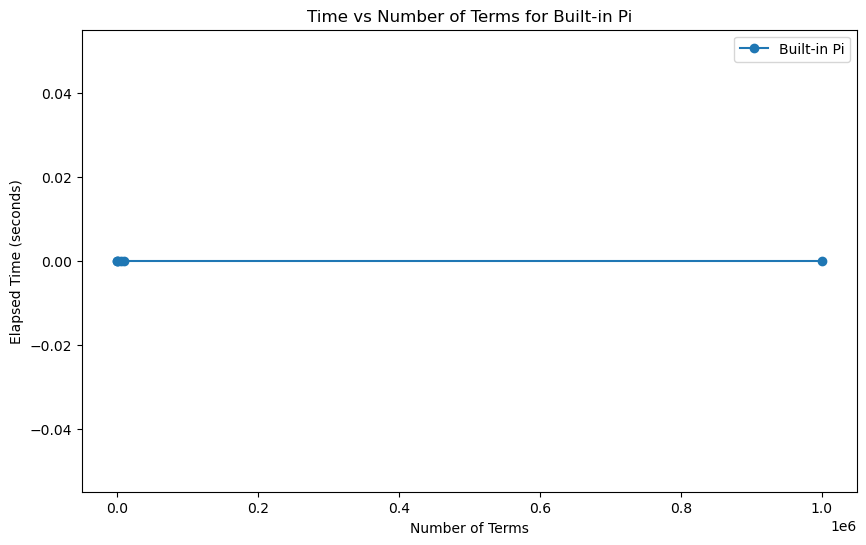

In [12]:
# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(num_terms_list, elapsed_times_builtin, marker='o', label='Built-in Pi')
plt.title('Time vs Number of Terms for Built-in Pi')
plt.xlabel('Number of Terms')
plt.ylabel('Elapsed Time (seconds)')
plt.legend()

plt.show()

In [13]:
# parallel processing using leibniz method

In [14]:
def estimate_pi_leibniz_parallel(num_terms, num_threads):
    pi_estimate = 0
    terms_per_thread = num_terms // num_threads
    threads = []

    def calculate_terms(start, end):
        nonlocal pi_estimate
        for k in range(start, end):
            term = (-1) ** k / (2 * k + 1)
            pi_estimate += term

    start_time = time.time()

    for i in range(num_threads):
        start = i * terms_per_thread
        end = (i + 1) * terms_per_thread if i < num_threads - 1 else num_terms
        thread = threading.Thread(target=calculate_terms, args=(start, end))
        thread.start()
        threads.append(thread)

    for thread in threads:
        thread.join()

    pi_estimate *= 4

    end_time = time.time()
    elapsed_time = end_time - start_time

    return pi_estimate, elapsed_time

In [15]:
num_terms_list = [100, 500, 1000, 5000, 10000, 1000000]
num_threads_list = [2, 4, 8, 10, 20]
pi_estimates_parallel = []
elapsed_times_parallel = []

In [16]:
for num_terms in num_terms_list:
    for num_threads in num_threads_list:
        pi_estimate, elapsed_time = estimate_pi_leibniz_parallel(num_terms, num_threads)
        pi_estimates_parallel.append(pi_estimate)
        elapsed_times_parallel.append(elapsed_time)
        print(f"Number of Terms: {num_terms}, Threads: {num_threads}, Estimated Pi: {pi_estimate}, Elapsed Time: {elapsed_time:.6f} seconds")

Number of Terms: 100, Threads: 2, Estimated Pi: 3.1315929035585537, Elapsed Time: 0.004011 seconds
Number of Terms: 100, Threads: 4, Estimated Pi: 3.1315929035585537, Elapsed Time: 0.000000 seconds
Number of Terms: 100, Threads: 8, Estimated Pi: 3.1315929035585537, Elapsed Time: 0.000000 seconds
Number of Terms: 100, Threads: 10, Estimated Pi: 3.1315929035585537, Elapsed Time: 0.005803 seconds
Number of Terms: 100, Threads: 20, Estimated Pi: 3.1315929035585537, Elapsed Time: 0.002507 seconds
Number of Terms: 500, Threads: 2, Estimated Pi: 3.139592655589785, Elapsed Time: 0.004007 seconds
Number of Terms: 500, Threads: 4, Estimated Pi: 3.139592655589785, Elapsed Time: 0.000000 seconds
Number of Terms: 500, Threads: 8, Estimated Pi: 3.139592655589785, Elapsed Time: 0.000000 seconds
Number of Terms: 500, Threads: 10, Estimated Pi: 3.139592655589785, Elapsed Time: 0.000000 seconds
Number of Terms: 500, Threads: 20, Estimated Pi: 3.139592655589785, Elapsed Time: 0.004000 seconds
Number of T

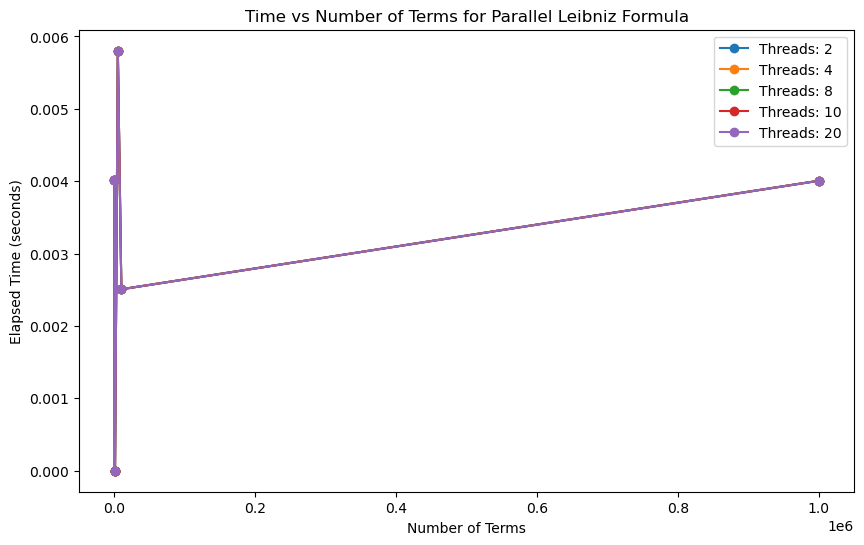

In [17]:
plt.figure(figsize=(10, 6))

for num_threads in num_threads_list:
    plt.plot(num_terms_list, elapsed_times_parallel[:len(num_terms_list)], marker='o', label=f'Threads: {num_threads}')

plt.title('Time vs Number of Terms for Parallel Leibniz Formula')
plt.xlabel('Number of Terms')
plt.ylabel('Elapsed Time (seconds)')
plt.legend()

plt.show()